In [ ]:
#importing/downloading relevant packages/modules
#downloading esda to use the esda.Moran_Local_BV class
try:
    import esda
except:
    %pip install esda
#geopandas to download and read the shapefile
import geopandas as gpd

#importing lps to generate spatial weight matrix
try:
    import libpysal as lps
except:
    %pip install libpysal
    import libpysal as lps


In [2]:
#downloading the main shapefile with all the necessary data
all_data = gpd.read_file("./to_all_variables_for_cluster_analysis.shp")
all_data.rename(columns = {'Percentage': 'Percentage of visible minority',
                           'Median tot': 'Median total income of households in 2020 ($)',
                            'Homeowners':'Homeownership rate (%)',
                            '30_increas': 'Net increase of 30-minute Access Area Coverage (2015-2025)',
                            '30_change': 'Change in 30-minute Access Area Coverage (2015-2025)'}, inplace=True)

In [3]:
# Creating spatial weights matrix
w = lps.weights.Queen.from_dataframe(all_data)  # Queen contiguity, to produce comparable weights to the univariate cluster analyses


C:\Users\saman\AppData\Local\Temp\ipykernel_6032\4274432425.py:2: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lps.weights.Queen.from_dataframe(all_data)  # Queen contiguity, to produce comparable weights to the univariate cluster analyses


In [4]:
#checking variable names before generating bivariate moran's I
all_data.head()

,DGUID,Percentage of visible minority,Median total income of households in 2020 ($),Homeownership rate (%),Change in 30-minute Access Area Coverage (2015-2025),15_change,30_2015,30_2025,15_2015,15_2025,15_increas,Net increase of 30-minute Access Area Coverage (2015-2025),geometry
0,2021S05075350004.00,12.7,50000.0,7.5,-0.479242,-0.005015,2.526425,2.047183,0.154599,0.149584,False,False,"POLYGON ((626198.492 4832612.597, 626208.179 4..."
1,2021S05075350007.01,10.3,57200.0,13.1,-0.479953,0.050586,2.260570,1.780618,0.130884,0.181469,True,False,"POLYGON ((626645.74 4832612.718, 626668.237 48..."
2,2021S05075350200.01,8.6,68000.0,32.8,0.000000,0.000000,0.132181,0.132181,0.021117,0.021117,False,False,"MULTIPOLYGON (((622045.985 4829707.008, 621842..."
3,2021S05075350248.03,7.7,99000.0,80.8,0.288911,0.000000,0.308541,0.597452,0.010387,0.010387,False,True,"POLYGON ((609666.582 4844979.583, 609698.086 4..."
4,2021S05075350249.01,7.5,102000.0,84.4,-1.848784,0.002776,3.643537,1.794752,0.175387,0.178163,True,False,"POLYGON ((613410.01 4845346.003, 613402.01 484..."


In [5]:
def output_global_stats_BV(gdf, col1, col2, weights):
    g_stats = esda.Moran_BV(gdf[col1], gdf[col2], weights)
    file_name = f"Bivariate Global Moran's I Results - {col1} - {col2}"

    I = g_stats.I
    p = g_stats.p_sim
    z = g_stats.z_sim

    output_string = f"Bivariate Global Moran's I Results - {col1} - {col2}\nMoran's I: {I}\np-value: {p}\nz-score: {z}\n"

    with open(file_name + ".txt", 'w') as f:
        f.write(file_name)
        f.write(output_string)
    
    return output_string

In [5]:
#generating bivariate local Moran's I
ML_bv_income_mobility = esda.Moran_Local_BV(all_data['Median total income of households in 2020 ($)'], all_data['Change in 30-minute Access Area Coverage (2015-2025)'], w)
ML_bv_homeowners_mobility = esda.Moran_Local_BV(all_data['Homeownership rate (%)'], all_data['Change in 30-minute Access Area Coverage (2015-2025)'], w)
ML_bv_minority_mobility = esda.Moran_Local_BV(all_data['Percentage of visible minority'], all_data['Change in 30-minute Access Area Coverage (2015-2025)'], w)


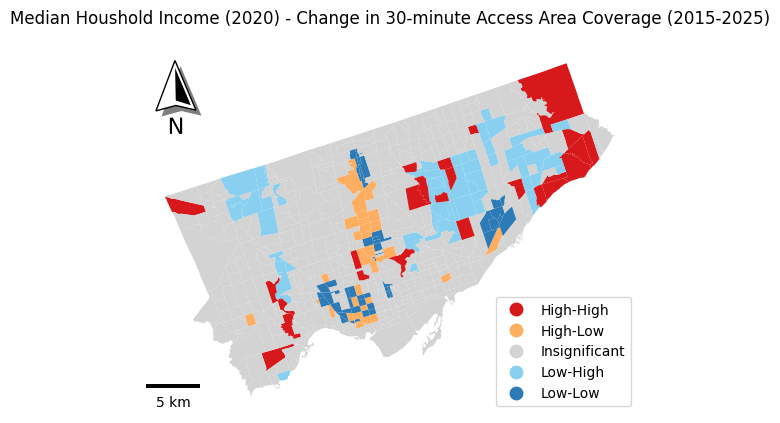

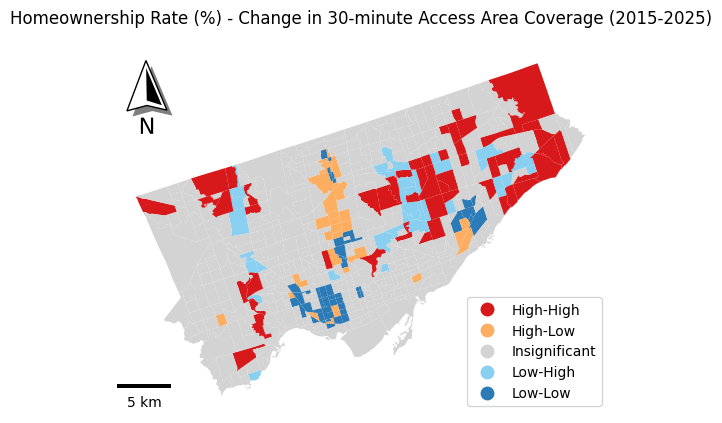

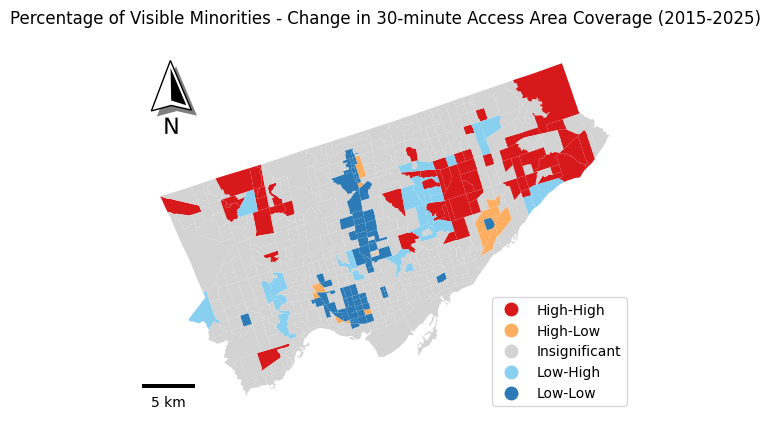

In [6]:
#plotting b
from plotter import plot_local_moran

f1, ax = plot_local_moran(ML_bv_income_mobility, all_data, 'Median Houshold Income (2020) - Change in 30-minute Access Area Coverage (2015-2025)')
f2, ax = plot_local_moran(ML_bv_homeowners_mobility, all_data, 'Homeownership Rate (%) - Change in 30-minute Access Area Coverage (2015-2025)')
f3, ax = plot_local_moran(ML_bv_minority_mobility, all_data, 'Percentage of Visible Minorities - Change in 30-minute Access Area Coverage (2015-2025)')

In [8]:
# Save the figures to .png form to include in paper
f1.savefig('Median Income & Mobility Bivariate Local Moran.png')
f2.savefig('Homeownership rate & Mobility Bivariate Local Moran.png')
f3.savefig('Percentage of Visible Minorities & Mobility Bivariate Local Moran.png')

In [9]:
# Need the global statistics to help interpret maps
print(output_global_stats_BV(all_data, 'Median total income of households in 2020 ($)', 'Change in 30-minute Access Area Coverage (2015-2025)', w))
print(output_global_stats_BV(all_data, 'Homeownership rate (%)', 'Change in 30-minute Access Area Coverage (2015-2025)', w))
print(output_global_stats_BV(all_data, 'Percentage of visible minority', 'Change in 30-minute Access Area Coverage (2015-2025)', w))

Bivariate Global Moran's I Results - Median total income of households in 2020 ($) - Change in 30-minute Access Area Coverage (2015-2025)
Moran's I: -0.009409027386691743
p-value: 0.382
z-score: -0.28710255434626986

Bivariate Global Moran's I Results - Homeownership rate (%) - Change in 30-minute Access Area Coverage (2015-2025)
Moran's I: 0.09384466983921674
p-value: 0.001
z-score: 3.409822234338978

Bivariate Global Moran's I Results - Percentage of visible minority - Change in 30-minute Access Area Coverage (2015-2025)
Moran's I: 0.16368572995510117
p-value: 0.001
z-score: 5.0454323581394975



In [10]:
# Check out what the relationship is for the increase/decrease observation
print(output_global_stats_BV(all_data, 'Median total income of households in 2020 ($)', 'Net increase of 30-minute Access Area Coverage (2015-2025)', w))
print(output_global_stats_BV(all_data, 'Homeownership rate (%)', 'Net increase of 30-minute Access Area Coverage (2015-2025)', w))
print(output_global_stats_BV(all_data, 'Percentage of visible minority', 'Net increase of 30-minute Access Area Coverage (2015-2025)', w))

Bivariate Global Moran's I Results - Median total income of households in 2020 ($) - Net increase of 30-minute Access Area Coverage (2015-2025)
Moran's I: -0.027610233087142506
p-value: 0.185
z-score: -0.973948734489177

Bivariate Global Moran's I Results - Homeownership rate (%) - Net increase of 30-minute Access Area Coverage (2015-2025)
Moran's I: 0.10250800622569836
p-value: 0.001
z-score: 3.9205233970347293

Bivariate Global Moran's I Results - Percentage of visible minority - Net increase of 30-minute Access Area Coverage (2015-2025)
Moran's I: 0.13584103451770294
p-value: 0.001
z-score: 4.046249232335788



In [11]:
# Since the output of Global BV for Homeowners and Percentage Minorities were significant, visualize them locally
ML_bv_homeowners_increase = esda.Moran_Local_BV(all_data['Homeownership rate (%)'], all_data['Net increase of 30-minute Access Area Coverage (2015-2025)'], w)
ML_bv_minority_increase = esda.Moran_Local_BV(all_data['Percentage of visible minority'], all_data['Net increase of 30-minute Access Area Coverage (2015-2025)'], w)

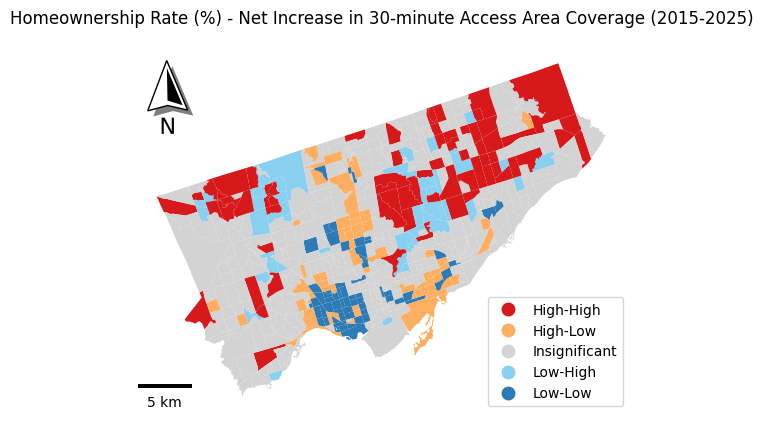

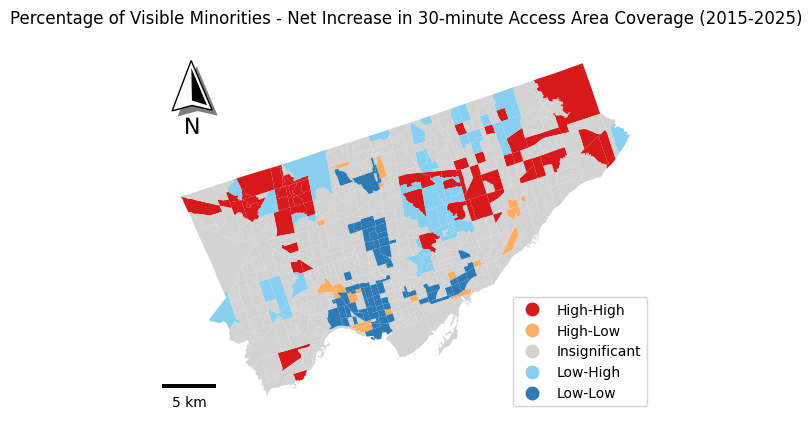

In [12]:
f2, ax = plot_local_moran(ML_bv_homeowners_increase, all_data, 'Homeownership Rate (%) - Net Increase in 30-minute Access Area Coverage (2015-2025)')
f3, ax = plot_local_moran(ML_bv_minority_increase, all_data, 'Percentage of Visible Minorities - Net Increase in 30-minute Access Area Coverage (2015-2025)')

In [13]:
f2.savefig('Homeownership rate & Mobility Increase Bivariate Local Moran.png')
f3.savefig('Percentage of Visible Minorities & Mobility Increase Bivariate Local Moran.png')